In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt

In [2]:
repos = pd.read_csv("results/repos.csv", header=0)
repos["repo"] = repos["repo"].map(lambda x: x[len("/repos/"):])
users = pd.read_csv("results/users.csv", header=0)
users["user_id"] = users["user_id"].map(lambda x: int(x.lstrip('/users')))
repos.head(5)

,repo,visit_counts
0,resume/resume.github.com,131
1,twbs/bootstrap,110
2,facebook/react,98
3,nodejs/node,95
4,tensorflow/tensorflow,93


In [4]:
repo_info = pd.read_csv("results/repostats.csv")
comb_repos = repos.merge(repo_info, how="inner", right_on="full_name", left_on="repo")
comb_repos = comb_repos.drop("full_name", axis=1)
comb_repos.head(5)

,repo,visit_counts,stargazers_count,language,forks_count
0,resume/resume.github.com,131,35703,JavaScript,940
1,twbs/bootstrap,110,123689,CSS,59001
2,facebook/react,98,93586,JavaScript,17630
3,nodejs/node,95,47642,JavaScript,10018
4,tensorflow/tensorflow,93,96424,C++,61369


In [51]:
repos[repos["repo"] == "freeCodeCamp/freeCodeCamp"]

,repo,visit_counts
29,freeCodeCamp/freeCodeCamp,51


In [5]:
comb_repos.head(10)

,repo,visit_counts,stargazers_count,language,forks_count
0,resume/resume.github.com,131,35703,JavaScript,940
1,twbs/bootstrap,110,123689,CSS,59001
2,facebook/react,98,93586,JavaScript,17630
3,nodejs/node,95,47642,JavaScript,10018
4,tensorflow/tensorflow,93,96424,C++,61369
5,Microsoft/vscode,92,47993,TypeScript,6460
6,nodejs/node-v0.x-archive,90,35920,None,7949
7,golang/go,84,40320,Go,5471
8,rust-lang/rust,83,27698,Rust,4854
9,facebook/react-native,78,62600,JavaScript,14229


In [6]:
top_250_login = set(users.loc[:250, "user_id"].tolist())
top_250_repo = set(repos.loc[:250, "repo"].tolist())

In [7]:
user_info = pd.read_csv("results/userstats.csv")
merg_user = users.merge(user_info, how="left", right_on="id", left_on="user_id")
merg_user = merg_user.drop("id", axis=1)
user_contributions = pd.read_csv("results/contributions.csv")
comb_user = merg_user.merge(user_contributions, how="left", on="login")
comb_user = comb_user.fillna(0)
comb_user.head(5)

,user_id,visit_counts,login,followers,following,public_repos,contributions
0,170270,512,sindresorhus,24075.0,50.0,984.0,0.0
1,25254,454,tj,34773.0,47.0,273.0,2933.0
2,12631,248,substack,12157.0,224.0,928.0,68.0
3,66577,248,JakeWharton,45515.0,12.0,95.0,2654.0
4,810438,222,gaearon,27947.0,171.0,227.0,3155.0


In [8]:
comb_user.head(10)

,user_id,visit_counts,login,followers,following,public_repos,contributions
0,170270,512,sindresorhus,24075.0,50.0,984.0,0.0
1,25254,454,tj,34773.0,47.0,273.0,2933.0
2,12631,248,substack,12157.0,224.0,928.0,68.0
3,66577,248,JakeWharton,45515.0,12.0,95.0,2654.0
4,810438,222,gaearon,27947.0,171.0,227.0,3155.0
5,499550,188,yyx990803,29984.0,90.0,143.0,2645.0
6,9287,167,isaacs,8129.0,2.0,373.0,1698.0
7,65632,162,antirez,9399.0,3.0,56.0,627.0
8,230541,158,mbostock,17633.0,13.0,58.0,1277.0
9,13041,155,rauchg,6223.0,703.0,102.0,3047.0


In [9]:
repo_counts = repos["visit_counts"].tolist()
user_counts = users["visit_counts"].tolist()

In [21]:
def make_hist(data, bins, tit, xlab, ylab):
    if bins == -1:
        plt.hist(data, density=True)
    else:
        plt.hist(data, bins=bins, density=True)
    plt.title(tit)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

Mean repo visits: 1.7209232886315544
Median repo visits: 1.0
Max repo visits: 131
25th, 75th percentile: 1.0 2.0


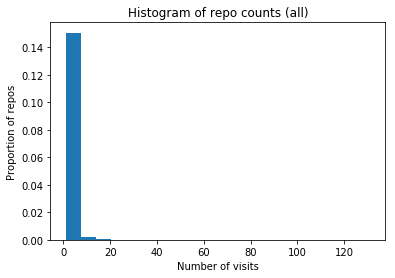

In [14]:
# Repo statistics 
print("Mean repo visits:", np.mean(repo_counts))
print("Median repo visits:", np.median(repo_counts))
print("Max repo visits:", np.max(repo_counts))
print("25th, 75th percentile:", np.percentile(repo_counts, 25), np.percentile(repo_counts, 75))
make_hist(repo_counts, 20, "Histogram of repo counts (all)", "Number of visits", "Proportion of repos")

Mean repo visits: 34.688
Median repo visits: 28.0
Max repo visits: 131
25th, 75th percentile: 24 40


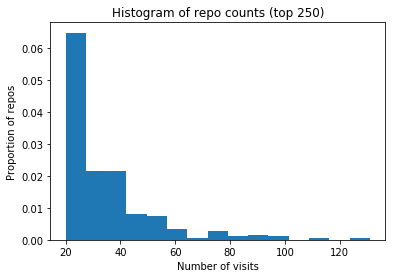

In [17]:
top_250_repos = repo_counts[:250]
make_hist(top_250_repos, 15, "Histogram of repo counts (top 250)", "Number of visits", "Proportion of repos")
print("Mean repo visits:", np.mean(top_250_repos))
print("Median repo visits:", np.median(top_250_repos))
print("Max repo visits:", np.max(top_250_repos))
print("25th, 75th percentile:", np.percentile(top_250_repos, 25, interpolation="nearest"), np.percentile(top_250_repos, 75, interpolation="nearest"))

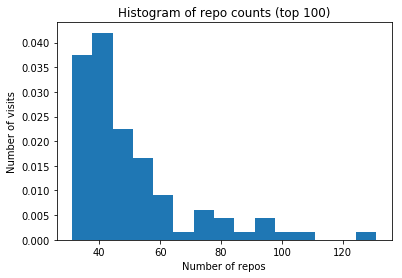

In [32]:
top_100_repos = repo_counts[:100]
make_hist(top_100_repos, 15, "Histogram of repo counts (top 100)", "Number of visits", "Proportion of repos")

Mean user visits: 2.7351886440044826
Median user visits: 1.0
Max user visits: 512
25th, 75th percentile: 1 2


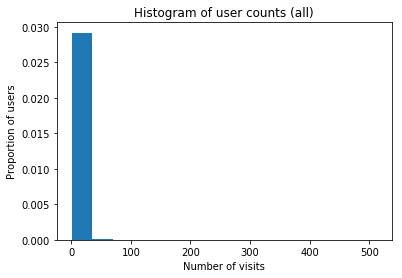

In [19]:
# Users statistics
print("Mean user visits:", np.mean(user_counts))
print("Median user visits:", np.median(user_counts))
print("Max user visits:", np.max(user_counts))
print("25th, 75th percentile:", np.percentile(user_counts, 25, interpolation="nearest"), np.percentile(user_counts, 75, interpolation="nearest"))
make_hist(user_counts, 15, "Histogram of user counts (all)", "Number of visits", "Proportion of users")

Mean user visits: 70.16
Median user visits: 53.0
Max user visits: 512
25th, 75th percentile: 46 75


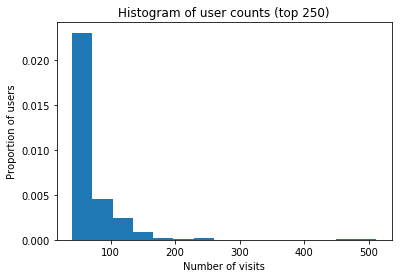

In [20]:
top_250_users = user_counts[:250]
print("Mean user visits:", np.mean(top_250_users))
print("Median user visits:", np.median(top_250_users))
print("Max user visits:", np.max(top_250_users))
print("25th, 75th percentile:", np.percentile(top_250_users, 25, interpolation="nearest"), np.percentile(top_250_users, 75, interpolation="nearest"))
make_hist(top_250_users, 15, "Histogram of user counts (top 250)", "Number of visits", "Proportion of users")

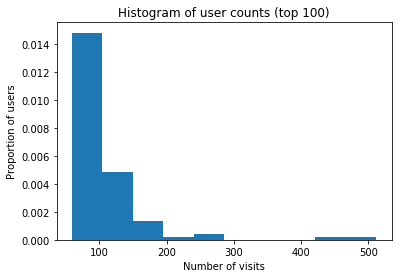

In [45]:
top_100_users = user_counts[:100]
make_hist(top_100_users, 10, "Histogram of user counts (top 100)", "Number of visits", "Proportion of users")

In [23]:
user_rankings = users.copy()
user_rankings["our_rank"] = user_rankings.index + 1
user_rankings.head(5)

,user_id,visit_counts,our_rank
0,170270,512,1
1,25254,454,2
2,12631,248,3
3,66577,248,4
4,810438,222,5


In [29]:
# Compare our user ranking vs. user ranking based on # of contributions
# userid | user | our rank | contri rank
sort_by_contr = comb_user.sort_values("contributions", ascending=False)
sort_by_contr = sort_by_contr.reset_index()
sort_by_contr = sort_by_contr.drop(["index"], axis=1)
sort_by_contr["contr_rank"] = sort_by_contr.index + 1
new_user = user_rankings.merge(sort_by_contr, how="inner", on="user_id")
contr_rank = new_user[["user_id", "login", "our_rank", "contr_rank"]]

t250_contr_rank = contr_rank[(contr_rank["user_id"].isin(top_250_login)) & (contr_rank["contr_rank"] < 35000)]
t250_contr_rank.head(10)

,user_id,login,our_rank,contr_rank
0,170270,sindresorhus,1,904
1,25254,tj,2,84
2,12631,substack,3,537
3,66577,JakeWharton,4,102
4,810438,gaearon,5,71
5,499550,yyx990803,6,103
6,9287,isaacs,7,179
7,65632,antirez,8,349
8,230541,mbostock,9,227
9,13041,rauchg,10,81


Correlation is r= 0.17488540389009147


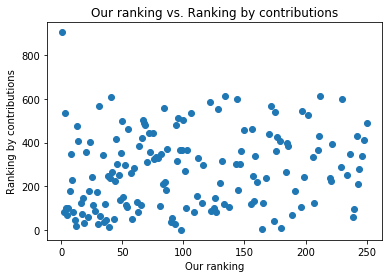

In [25]:
plt.scatter(t250_contr_rank["our_rank"], t250_contr_rank["contr_rank"])
plt.title("Our ranking vs. Ranking by contributions")
plt.xlabel("Our ranking")
plt.ylabel("Ranking by contributions")
print("Correlation is r=", t250_contr_rank["our_rank"].corr(t250_contr_rank["contr_rank"]))

In [32]:
# # Compare our user ranking vs. user ranking based on # of followers
# # userid | user | our rank | follower rank
sort_by_f = comb_user.sort_values("followers", ascending=False)
sort_by_f = sort_by_f.reset_index()
#sort_by_f = sort_by_f.drop(["index"], axis=1)
sort_by_f["f_rank"] = sort_by_f.index + 1
new_user_f = user_rankings.merge(sort_by_f, how="inner", on="user_id")
f_rank = new_user_f[["user_id", "login", "our_rank", "f_rank"]]
t250_f_rank = f_rank[(f_rank["user_id"].isin(top_250_login)) & (f_rank["f_rank"] < 1000)]

t250_f_rank.head(5)

,user_id,login,our_rank,f_rank
0,170270,sindresorhus,1,8
1,25254,tj,2,3
2,12631,substack,3,24
3,66577,JakeWharton,4,1
4,810438,gaearon,5,6


Correlation is r= 0.4592953096785446


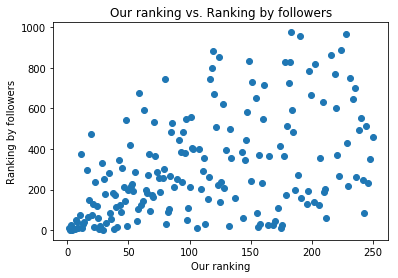

In [31]:
plt.scatter(t250_f_rank["our_rank"], t250_f_rank["f_rank"])
t250_f_rank["our_rank"].corr(t250_f_rank["f_rank"])
plt.title("Our ranking vs. Ranking by followers")
plt.xlabel("Our ranking")
plt.ylabel("Ranking by followers")

print("Correlation is r=", t250_f_rank["our_rank"].corr(t250_f_rank["f_rank"]))

In [28]:
repo_rankings = repos.copy()
repo_rankings["our_rank"] = repo_rankings.index + 1
repo_rankings.head(5)

,repo,visit_counts,our_rank
0,resume/resume.github.com,131,1
1,twbs/bootstrap,110,2
2,facebook/react,98,3
3,nodejs/node,95,4
4,tensorflow/tensorflow,93,5


In [53]:
# # Compare our user ranking vs. user ranking based on # of contributions
# # userid | user | our rank | contri rank
sort_by_star = comb_repos.sort_values("stargazers_count", ascending=False)
sort_by_star = sort_by_star.reset_index()
sort_by_star = sort_by_star.drop("index", axis=1)
sort_by_star["s_rank"] = sort_by_star.index + 1
new_star = repo_rankings.merge(sort_by_star, how="inner", on="repo")
star_rank = new_star[["repo", "our_rank", "s_rank"]]
t250_s_rank = star_rank[(star_rank["repo"].isin(top_250_repo))]# & (star_rank["s_rank"] < 1000)]

# sort_by_f = comb_user.sort_values("followers", ascending=False)
# sort_by_f = sort_by_f.reset_index()
# #sort_by_f = sort_by_f.drop(["index"], axis=1)
# sort_by_f["f_rank"] = sort_by_f.index + 1
# new_user_f = user_rankings.merge(sort_by_f, how="inner", on="user_id")
# f_rank = new_user_f[["user_id", "login", "our_rank", "f_rank"]]
# t250_f_rank = f_rank[(f_rank["user_id"].isin(top_250_login)) & (f_rank["f_rank"] < 1000)]

# t250_f_rank.head(5)
t250_s_rank.head(5)

,repo,our_rank,s_rank
0,resume/resume.github.com,1,46
1,twbs/bootstrap,2,2
2,facebook/react,3,5
3,nodejs/node,4,24
4,tensorflow/tensorflow,5,4


Correlation is r= 0.3437280227212541


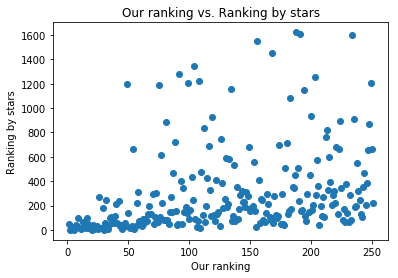

In [237]:
plt.scatter(t250_s_rank["our_rank"], t250_s_rank["s_rank"])
plt.title("Our ranking vs. Ranking by stars")
plt.xlabel("Our ranking")
plt.ylabel("Ranking by stars")

print("Correlation is r=", t250_s_rank["our_rank"].corr(t250_s_rank["s_rank"]))

In [50]:
lang_count = comb_repos[:250].groupby("language").count()["repo"]
#lang_weight = (np.array(lang_count) * np.array(comb_repos[:250]["visit_counts"])).tolist()
np.array(lang_count)
lang_weight = comb_repos[:250].groupby("language").sum()["visit_counts"]

#comb_weight.head(5)
# lang_weighted = comb_weight.groupby("language").sum()
# #lang_weighted
# comb_repos
lang_comp = pd.DataFrame({"Counts" : lang_count, "Counts weighted by visits" : lang_weight})
lang_comp.sort_values("Counts weighted by visits", ascending=False).head(10)

,Counts,Counts weighted by visits
language,,
JavaScript,89,3255
None,26,884
Python,19,593
C++,12,485
Go,13,472
TypeScript,7,310
C,9,289
Ruby,9,283
Shell,9,268
